In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## 1.

Consider the Lagrangan interpolation of the function   $f(x) = \frac{1}{25x^{2}+1}$ for $n=6$, $n=8$, $n=10$, $n =12$ done in Exercise 1. Now, discretize the domain with $m =100$ equalli spaced points in the interval $[-1,1]$. Compute the Error-Norm-2, defined as

$$EN2 = \frac{1}{m}\sqrt{\sum_{i=1}^{m}\left(\frac{p(x)-f(x)}{f(x)}\right)^{2}}$$

for the cases $n = \{6,8,10,12\}$

**Solution**

First copy the function write in the before Exercise 

In [57]:
def L(xi,yi,x):
    n  = len(xi); nx = len(x)
    dx = xi     ; dy = yi
    La = [0.]*(nx)
    def b(j,xi):
        v = 1.0
        for k in range(n):
            if k != j:
                v *= (xi-dx[k])/(dx[j]-dx[k])
        return v
    for i,xi in enumerate(x):
        for j in range(n):
            La[i] +=dy[j]*b(j,xi)
    
    return np.array(La)

Consider the discretization and EN2

In [58]:
m=100
n=[6,8,10,12,14,16]
x = lambda n: np.linspace(-1,1,n)
f = lambda x: 1/(25*x**2 + 1)

Error = []
for i in n:
    xi = x(i)
    yi = f(xi)
    Error.append(np.sqrt(sum(((L(xi,yi,x(m))-f(x(m)))/f(x(m)))**2))/m)


Text(0,0.5,'Error')

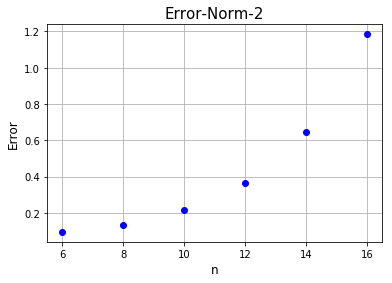

In [59]:
plt.plot(n,Error,"bo")
plt.grid(True)
plt.title("Error-Norm-2",fontsize="15")
plt.xlabel("n",fontsize="12")
plt.ylabel("Error",fontsize = "12")

## 2.

Now discretize the same function with $m_{2}=50$ equally spaced points in the interval $[-1,1]$. Implement a routine that interpolates $f(x)$ piecewise linearly between these $m_{2}$ data points and evaluate EN2 at the $m=100$ points use above. Compare your result to the results of both exercises.



### Newton interpolation 

This method of interpoolation allow find the polynomial of interpolation with $(n+1)$ nodes $(x_{i},f_{i})$, where $i = 0,...,n$. We take the hypothesis that $P_{n}$ will can be write in the next form 

$P_{n}(x_{o}) = c_{o} = f_{o}$

$P_{n}(x_{1}) = c_{o} + c_{1}(x_{1}-x_{o}) = f_{1}$

$P_{n}(x_{2}) = c_{o} + c_{1}(x_{2}-x_{o}) + c_{2}(x_{2}-x_{o})(x_{n}-x_{1}) = f_{2}$

$\vdots$

$P_{n}(x_{2}) = c_{o} + c_{1}(x_{n}-x_{o})+\cdots + c_{n}(x_{n}-x_{o})(x_{n}-x_{1})\cdots (x-x_{n-1}) = f_{n}$





Now, we need solve the polynomial like a triangular system. Nevertheless the results are more elegant and easy if we consider additional conditions like a the grade of the polynomial is a "inductive" element 

### **algorithm**

**Input**

   Nodes $(x_{i},f_{i})$, where $i = 0,\cdots, n$
    
**Output**

   polynomial coefficients $P_{0,1,2,3,\cdots,n}: \quad c:=(c_{o},c_{1},\cdots,c_{n})$
    
---
for $i=0,\cdots,n$ do 

   $t_{i}:=f_{i}$
   
   for $k = (i-1)(-1),\cdots,0$ do 
       
   $t_{k} := \frac{t_{k+1}-t_{k}}{x_{i}-x_{k}}$
   
   $c_{i}:=t_{o}$
   
output --> $c:=(c_{o},c_{1},\cdots,c_{n})$

---
    


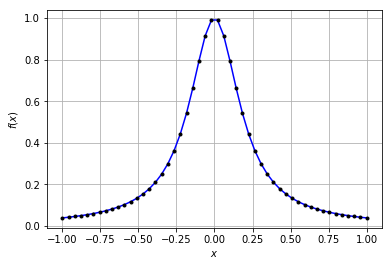

In [144]:


m2 = 50
n=100
x = lambda n: np.linspace(-1,1,n)
f = lambda x: 1/(25*x**2 + 1)

def inter_lin(f,x,m2):
    
    def y(xp,i):
        return ((x(m2)[i+1]-xp)/(x(m2)[i+1]-x(m2)[i]))*f(x(m2)[i]) + ((x(m2)[i]-xp)/(x(m2)[i]-x(m2)[i+1]))*f(x(m2)[i+1])
    
    for i in range(len(x(m2))-1):
        xp = np.linspace(x(m2)[i],x(m2)[i+1],100)
        plt.plot(xp,y(xp,i),"b-")
    plt.plot(x(m2),f(x(m2)),"k.")
    plt.grid(True)
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")

    
def plot(n):
    x = lambda n: np.linspace(-1,1,n)
    f = lambda x: 1/(25*x**2 + 1)

    xi = x(n)
    yi = f(x(n))

    plt.plot(x(250),f(x(250)),"k-")
    plt.plot(x(100),L(xi,yi,x(100)),"r--",label = "interpolacion")
    plt.plot(xi,yi,"r.",label = "Puntos experimentales")
    plt.grid(True)
    
inter_lin(f,x,m2)



Now the comparation between this two methods

Text(0.5,1,'Comparacion')

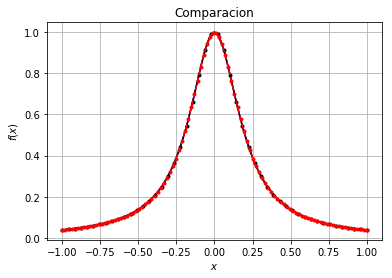

In [145]:
inter_lin(f,x,m2)
plot(n)
plt.title("Comparacion")

## 3.

Consider once more the function $f(x) = \frac{1}{25x^{2}+1}$. Discretize the domain with $m=21$ equally spaced points in the interval $[-1,1]$ and evaluate numerically its first derivative (centered finite difference inside the interval and one-side derivative on the boundaries). Using this informatio, implement a routine that generates a piecewise cubic Hermite interpolting polynomial in the interval. Plot the function and the interpolating polynomial 



Text(0.5,1,'Derivative of $f(x)=\\frac{1}{25x^{2}+1}$')

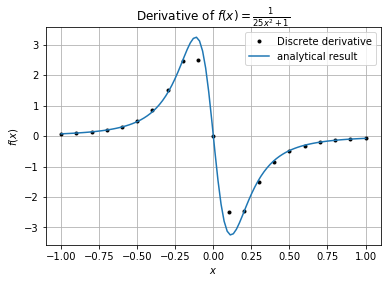

In [184]:
m = 21
x3 = x(21)
der = np.zeros(m)
der[0] = 0.5*(-3.0*f(x3)[0]+4.0*f(x3)[1]-f(x3)[2])/(x3[1]-x3[0])
der[1:-1] = (np.roll(f(x3),1)[1:-1]-np.roll(f(x3),-1)[1:-1])/(np.roll(x3,1)[1:-1]-np.roll(x3,-1)[1:-1])
der[-1] = 0.5*(3.0*f(x3)[-1]-4.0*f(x3)[-2]+f(x3)[-3])/(x3[-1]-x3[-2])
plt.plot(x3,der,"k.",label = "Discrete derivative")
plt.plot(x(100),(-50.*x(100))/(25.*x(100)**2 +1)**2, label = "analytical result")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Derivative of $f(x)=\\frac{1}{25x^{2}+1}$")

## Hermite interpolation 

The lagrange interpolating polynomial $P_{n}(x)$, has been defined  so that the polynomial agress with the origianl function $f(x)$ at $n+1$ distinct input values $x_{o},\cdots,x_{n}$. n the other handm Taylor polynomials aproximate a function using a single center point at wich we know the value of the function and the value of severla derivatives. Our goal is to generalize both the Lagrange polynomial and the Taylor polynomial by forming an interpolating polynomial that agrees with the function both at several distinct points and at given number of derivatives of the function at those distinct points. A polynomial that satisfies these conditions is called an **osculating polynomial**


**Definition**

Assume $x_{o},\cdots,x_{n}\in[a,b]$ are $n+1$ distinct numbers. Also , asumme $m_{o},\cdots,m_{n}$ are nonnegative integers where each integer, $m_{i}$, corresponds with $x_{i}$. Further asumme $f\in C^{m}[a,b]$ where $m = max\{m_{i}:0\leq i \leq n\}$.The **osculating polynomial** that approximates f is the polynomial $P(x)$ of least degree such that 

$$\frac{d^{k}P(x_{i})}{dx^{k}} = \frac{d^{k}f(x_{i})}{dx^{k}} \quad \text{for each  }1=0,\cdots,n\quad \text{and  } k=0,\cdots m_{i}$$

That is:

$$f(x_{o})=P(x_{o}), f'(x_{o})=P'(x_{o}),f''(x_{o})=P''(x_{o})\cdots f^{(m_{o})}(x_{o})=P^{(m_{o})}(x_{o})$$
$$\vdots$$
$$\vdots$$
$$f(x_{n})=P(x_{n}), f'(x_{n})=P'(x_{n}),f''(x_{n})=P''(x_{n})\cdots f^{(m_{n})}(x_{n})=P^{(m_{n})}(x_{n})$$

When there is a single point ,$x_{o}$, the soculating polynomial approximating $f$ is the Taylor polynomial of $m_{o}$ th degree

**Definition**

The osculating polynomial of $f$ formed when $m_{o}=m_{1}=\cdots= m_{n} = 1$ is called the *Hermite polynomial*

**Theorem**

Assume $f \in C^{1}[a,b]$ and $x_{o},\cdots,x_{n}\in [a,b]$ re distinct points. Then the unique polynomial of degree less than or equal to $2n+1$ id given by:

$$H_{2n+1} = \sum_{j=0}^{n}f(x_{j})H_{n,j}(x)+\sum_{j=0}^{n}f^{'}(x_{j})\hat{H}_{n,j}(x)$$

where
$$H_{n,j} = \left[1-2(x-x_{j})L^{'}_{n,j}(x_{j})\right]L^{2}_{n,j}(x)\qquad \hat{H}(x)=(x-x_{j})L^{2}_{n,j}(x)$$